In [1]:
import librosa
import librosa.display
from scipy.io import wavfile
import matplotlib.pyplot as plt

import numpy as np
import IPython.display as ip

import os
import pandas as pd
import glob
import random
#from tqdm import tqdm_pandas

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [140]:
import pyaudio, wave, wavio

In [162]:
audio_train = "audio_train"
audio_test = "audio_test"

In [153]:
train = pd.read_csv('train.csv')
test = pd.read_csv('sample_submission.csv')

In [154]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [155]:
train.label.value_counts()

Acoustic_guitar          300
Flute                    300
Fireworks                300
Trumpet                  300
Hi-hat                   300
Squeak                   300
Fart                     300
Cello                    300
Laughter                 300
Clarinet                 300
Saxophone                300
Applause                 300
Bass_drum                300
Snare_drum               300
Tearing                  300
Violin_or_fiddle         300
Double_bass              300
Shatter                  300
Oboe                     299
Gong                     292
Knock                    279
Writing                  270
Cough                    243
Bark                     239
Tambourine               221
Burping_or_eructation    210
Cowbell                  191
Harmonica                165
Drawer_open_or_close     158
Meow                     155
Electric_piano           150
Gunshot_or_gunfire       147
Microwave_oven           146
Keys_jangling            139
Telephone     

In [191]:
l = LabelEncoder()
y = l.fit(train.label.values)

train_classes = dict(zip(y.classes_,range(0,42)))

In [192]:
train_classes

{'Acoustic_guitar': 0,
 'Applause': 1,
 'Bark': 2,
 'Bass_drum': 3,
 'Burping_or_eructation': 4,
 'Bus': 5,
 'Cello': 6,
 'Chime': 7,
 'Clarinet': 8,
 'Computer_keyboard': 9,
 'Cough': 10,
 'Cowbell': 11,
 'Double_bass': 12,
 'Drawer_open_or_close': 13,
 'Electric_piano': 14,
 'Fart': 15,
 'Finger_snapping': 16,
 'Fireworks': 17,
 'Flute': 18,
 'Glockenspiel': 19,
 'Gong': 20,
 'Gunshot_or_gunfire': 21,
 'Harmonica': 22,
 'Hi-hat': 23,
 'Keys_jangling': 24,
 'Knock': 25,
 'Laughter': 26,
 'Meow': 27,
 'Microwave_oven': 28,
 'Oboe': 29,
 'Saxophone': 30,
 'Scissors': 31,
 'Shatter': 32,
 'Snare_drum': 33,
 'Squeak': 34,
 'Tambourine': 35,
 'Tearing': 36,
 'Telephone': 37,
 'Trumpet': 38,
 'Violin_or_fiddle': 39,
 'Writing': 40}

In [202]:
#understanding the data
i = random.choice(train.fname)
i

'b6e62c14.wav'

In [194]:
filename = os.path.join('.',audio_test,i)

In [195]:
ip.Audio(filename)

In [165]:
w = wave.open(filename)

In [196]:
wave, sample_rate = librosa.load(filename)

In [167]:
wave.shape

(8379,)

In [197]:
print('Sample_rate :', sample_rate)

Sample_rate : 22050


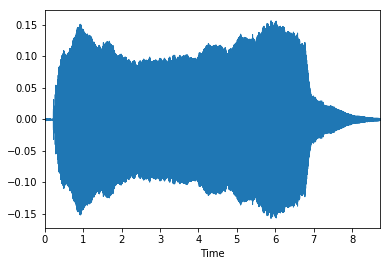

In [198]:
librosa.display.waveplot(wave,sample_rate)

In [199]:
#MFCC
mfcc = librosa.feature.mfcc(y=wave,sr=sample_rate,n_mfcc=50)

In [200]:
mfcc.shape

(50, 376)

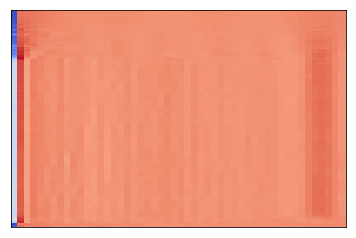

In [201]:
librosa.display.specshow(mfcc.T)

In [70]:
#Mel SPect
mel_s = librosa.feature.melspectrogram(y=wave,sr=sample_rate,n_mels=50)

In [71]:
mel_s.shape

(50, 14)

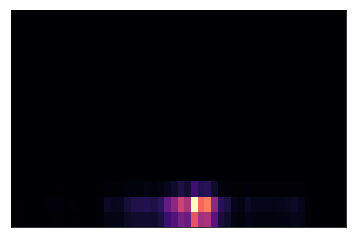

In [72]:
librosa.display.specshow(mel_s.T)

In [82]:
power = librosa.power_to_db(mel_s)

In [83]:
power.shape

(50, 14)

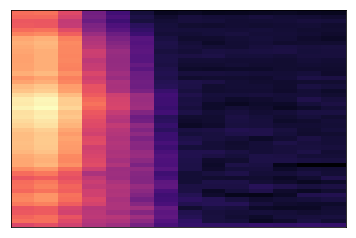

In [84]:
librosa.display.specshow(power)

In [77]:
#normalize
mena = np.mean(power); print(mena)

-52.16642717011113


In [78]:
std = np.std(power); print(std)

21.68712107747999


In [80]:
power -= mena
power /= std

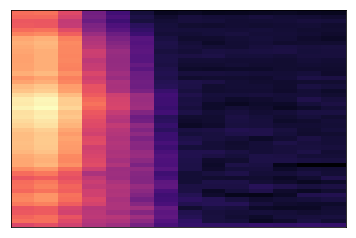

In [86]:
librosa.display.specshow(power)

In [168]:
#using melspec and power2db
def mel_sp(audio):
    try:
        wave, sr = librosa.load(audio)
        mel = librosa.feature.melspectrogram(y=wave,sr=sr)
        powm = librosa.power_to_db(mel)
        mean = np.mean(powm)
        std = np.std(powm)
        powm -= mean
        powm /= std
    except:
        print('Error while loading file: ',audio)
        return None
    
    return powm.T

In [169]:
#understanding the data
i = random.choice(test.fname)
i

'13a9b494.wav'

In [172]:
filename = os.path.join('.',audio_test,i)

In [173]:
ip.Audio(filename)

In [133]:
d = mel_sp(filename)

In [134]:
d.shape

(128, 267)

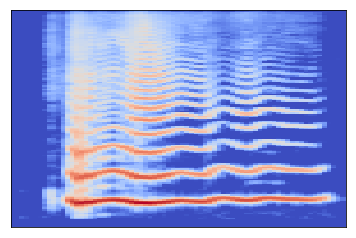

In [116]:
librosa.display.specshow(d)#fart

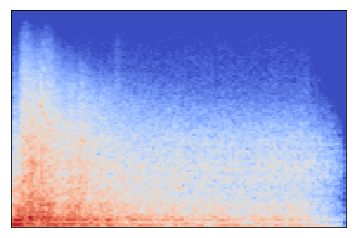

In [123]:
librosa.display.specshow(d)#thunder

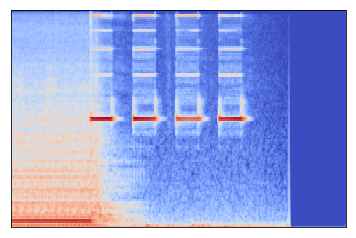

In [129]:
librosa.display.specshow(d)#reverse beep

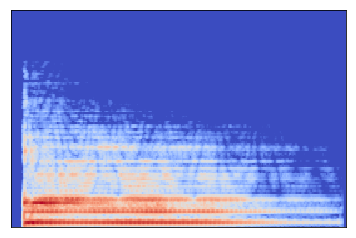

In [139]:
librosa.display.specshow(d)#honk

In [ ]:
#train.apply(parser,axis=1)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F

from torch.autograd import Variable

In [13]:
from torch.utils.data import Dataset

In [14]:
from torchvision import transforms, utils

In [174]:
import torchaudio

ImportError: No module named 'torchaudio'

# Power of Dataloader

In [277]:
class UrbanSound(Dataset):
    
    def __init__(self,mode,classes,root,preprocess=None,transform=None):
        
        
        self.mode = mode
        if(self.mode is "train"):
            self.dat = pd.read_csv('train.csv')
            
        elif self.mode is "test":
            self.dat = pd.read_csv('sample_submission.csv',nrows=10)
            
        self.train_x = train['fname']
        self.train_y = train['label']
        self.classes = classes
        self.root = root
        self.preprocess = preprocess
        self.transform = transform
        
        
    def __len__(self):
        return len(self.train_x)
    
    def __getitem__(self,idx):
        
        filename = os.path.join('.',self.root,self.train_x[idx])
        mel_s = self.preprocess(filename)
        
        if self.transform:
            mel_s = self.transform(mel_s)
        
        if self.mode is "train":
            label = self.classes[self.train_y[idx]]
            return mel_s, label
        
        if self.mode is "test":
            label = self.classes[self.train_y[idx]]
            return mel_s, label

In [218]:
def collate_cnn(batch):
    feature, label = zip(*batch)
    target = [lab for lab in label]
    target = torch.LongTensor(target)
    
    dpp = torch.Tensor(len(feature),128,128)
    for i, feat in enumerate(feature):
        try:
            dpp[i,:,:] = torch.from_numpy(feat[:128])
            
        except:
            #print("Size mismatch:", feat.shape[0], " x ",feat.shape[1])
            continue
            
    return dpp,target
        

In [17]:
#data_trainsform = transforms.Compose([transforms.Resize(128)])

In [222]:
x_train = UrbanSound(mode='train',classes=train_classes,root=audio_train,preprocess=mel_sp)

In [283]:
x_test = UrbanSound(mode='test',classes=train_classes,root=audio_train,preprocess=mel_sp)

In [284]:
x_test[100]

(array([[-0.49195632, -1.06654881, -0.49801103, ..., -2.7502938 ,
         -2.7502938 , -2.7502938 ],
        [-0.17718523, -0.84651144, -0.20940071, ..., -2.7502938 ,
         -2.7502938 , -2.7502938 ],
        [ 0.28466303, -0.20317578,  0.12434696, ..., -2.7502938 ,
         -2.7502938 , -2.7502938 ],
        ...,
        [-1.72876601, -1.02502597,  0.16318518, ..., -2.7502938 ,
         -2.7502938 , -2.7502938 ],
        [-2.10221428, -1.38061509, -0.26894357, ..., -2.7502938 ,
         -2.7502938 , -2.7502938 ],
        [-1.90826087, -1.70431534, -0.49276572, ..., -2.7502938 ,
         -2.7502938 , -2.7502938 ]]), 18)

In [225]:
x_train = torch.utils.data.DataLoader(x_train,batch_size=100,collate_fn=collate_cnn)

In [285]:
x_test = torch.utils.data.DataLoader(x_test,batch_size=1,collate_fn=collate_cnn)

(array([[ 0.93198736,  1.22242828,  1.30965182, ...,  2.21226382,
         1.63681802,  1.45680462],
       [ 1.36812426,  1.42169779,  1.75638792, ...,  2.32493498,
         1.80774953,  1.48194096],
       [ 1.52000159,  1.61844921,  1.77294654, ...,  2.35994662,
         1.96280214,  1.49517514],
       ...,
       [-1.05477668, -1.05477668, -1.05477668, ..., -1.05477668,
        -1.05477668, -1.05477668],
       [-1.05477668, -1.05477668, -1.05477668, ..., -1.05477668,
        -1.05477668, -1.05477668],
       [-1.05477668, -1.05477668, -1.05477668, ..., -1.05477668,
        -1.05477668, -1.05477668]]),)
torch.Size([128, 1, 128])


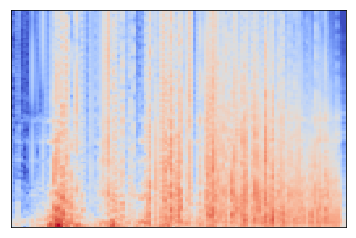

In [287]:
for i, batch in enumerate(x_test):
    print(batch[0][0].unsqueeze(1).size())
    librosa.display.specshow(batch[0][0].numpy())
    
    if i == 0:
        break

## Model

In [228]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32,kernel_size=5,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Linear(32768,10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out

In [242]:
model = CNN()
model.cuda()
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (fc): Linear(in_features=32768, out_features=10, bias=True)
)


In [74]:
#del model

In [230]:
torch.cuda

<module 'torch.cuda' from 'd:\\miniconda2\\envs\\pytorch-env\\lib\\site-packages\\torch\\cuda\\__init__.py'>

In [231]:
creiterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.02)

In [ ]:
for epoch in range(5):
    for i , batch in enumerate(x_train):
        dat = Variable(batch[0]).cuda()
        label = Variable(batch[1]).cuda()
        
        dat = dat.unsqueeze(1)
        
        optimizer.zero_grad()
        output = model(dat)
        loss= creiterion(output,label)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print("Epoch [%d/%d], Iter [%d/%d] Loss: %4f"%(epoch+1,10,i+1,len(x_train)//100, loss.data[0]))

In [233]:
loss.data[0]

2.207324981689453

In [241]:
torch.save(model.state_dict(),"torch_baseline_free_sound.plk")

In [237]:
model.eval()
test_loss = 0
correct = 0

In [ ]:
model.eval()
for i, batch in enumerate(x_test):
    daat = Variable(batch[0]).cuda()
    daat = daat.unsqueeze(1)
    pred = model(daat)

In [259]:
x1, x2 = torch.max(pred.data,1)

In [263]:
dddd = np.array(x2)

In [264]:
dddd

array([5, 5, 3, 5, 5, 8, 5, 8, 5, 8, 5, 8, 8, 5, 8, 0, 3, 8, 5, 8, 5, 3,
       5, 8, 5, 0, 5, 5, 8, 8, 3, 5, 5, 5, 3, 5, 5, 3, 8, 5, 5, 5, 0, 2,
       8, 5, 8, 8, 5, 4, 5, 8, 5, 0, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 0, 5,
       5, 9, 8, 5, 5, 5, 5], dtype=int64)